<a href="https://colab.research.google.com/github/namozhdehi/KSR/blob/main/Store_sales_EDA_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Load The Data

In [2]:
df=pd.read_csv(r"train.csv")

# Explore The Data

In [3]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [5]:
df.shape

(1017209, 9)

In [6]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

# **Variable Identification and Typecasting**

In [7]:
df.dtypes

,0
Store,int64
DayOfWeek,int64
Date,object
Sales,int64
Customers,int64
Open,int64
Promo,int64
StateHoliday,object
SchoolHoliday,int64


**dtype:** object

There are some variables visible at each types, so let's narrow this down by looking at one datatype at once. We will start with int

# **Integer Data Type**

In [8]:
df.dtypes[df.dtypes == 'int64']

,0
Store,int64
DayOfWeek,int64
Sales,int64
Customers,int64
Open,int64
Promo,int64
SchoolHoliday,int64


**dtype:** int

**Summary:**

*   **Store:** Correct data type (integer).
*   **DayOfWeek:** Correct data type (integer).
*   **Sales:** Correct data type (integer).
*   **Customers:** Correct data type (integer).
*   **Open:** Correct data type (integer).
*   **Promo:** Correct data type (integer).
*   **SchoolHoliday:** Correct data type (integer).

In [9]:
df.dtypes[df.dtypes == 'object']

,0
Date,object
StateHoliday,object


dtype: object
Summary:

*   **Date** column is expected to be in the format of a string so, it need to be converted to datetime format.

*   **StateHoliday** column is currently represented as an object (likely because it contains categorical values like '0', 'a', 'b', 'c'). This column can be converted to a categorical data type to reduce memory usage and optimize processing time during analysis.

# **Date related variables**

In [10]:
# Convert date field to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


# **Object related variables**

In [11]:
df['StateHoliday'].value_counts()

,count
StateHoliday,
0,855087
0,131072
a,20260
b,6690
c,4100


In [12]:
# Convert the StateHoliday column to a categorical type
df['StateHoliday'] = df['StateHoliday'].astype('category')

# Verify the conversion
df['StateHoliday'].dtype

CategoricalDtype(categories=[0, '0', 'a', 'b', 'c'], ordered=False, categories_dtype=object)

# **Univariate Analysis: Numerical Variables**

In [13]:
# Numerical datatypes
df.select_dtypes(include=['int32', 'int64', 'float64','Int64']).dtypes

,0
Store,int64
DayOfWeek,int64
Sales,int64
Customers,int64
Open,int64
Promo,int64
SchoolHoliday,int64


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def UVA_numeric(data, var_group):
    """
    This function takes a dataframe and a variable group as arguments
    and converts the variable group to numeric.
    It then calculates the descriptives of the variable.
    """
    size = len(var_group)
    cols = 4  # Number of columns per row
    rows = (size // cols) + (size % cols > 0)  # Calculate number of rows needed

    plt.figure(figsize=(7*cols, 5*rows), dpi=100)

    for j, i in enumerate(var_group):
        # Check if the column exists in the DataFrame
        if i not in data.columns:
            print(f"Column '{i}' not found in the DataFrame.")
            continue

        try:
            # Attempt to convert the column to numeric
            data[i] = pd.to_numeric(data[i], errors='coerce')
        except TypeError as e:
            # Handle TypeError, print the original exception and problematic value
            print(f"Error converting column '{i}': {e}")
            problematic_value = data[i].iloc[0]  # Get the first problematic value
            print(f"Problematic value: {problematic_value}, Type: {type(problematic_value)}")
            continue

        # Calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max() - data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()

        # Calculating points of standard deviation
        points = mean - st_dev, mean + st_dev

        # Plotting the variable with every information
        plt.subplot(rows, cols, j + 1)
        sns.kdeplot(data[i], shade=True)

        # Plotting standard deviation, min/max, mean, and median using lines
        plt.axvline(x=points[0], color='black', linestyle='--', label="std_dev")
        plt.axvline(x=points[1], color='black', linestyle='--')
        plt.axvline(x=mini, color='orange', linestyle='-', label="min/max")
        plt.axvline(x=maxi, color='orange', linestyle='-')
        plt.axvline(x=mean, color='red', linestyle='-', label="mean")
        plt.axvline(x=median, color='blue', linestyle='-', label="median")

        plt.xlabel('{}'.format(i), fontsize=20)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(
            (round(points[0], 2), round(points[1], 2)),
            round(kurt, 2),
            round(skew, 2),
            (round(mini, 2), round(maxi, 2), round(ran, 2)),
            round(mean, 2),
            round(median, 2)))

        plt.legend(loc='upper right')  # Place the legend in the upper right corner

    plt.tight_layout()
    plt.show()

**Univariate Analysis**

Store            int64
DayOfWeek        int64
Sales            int64
Customers        int64
Open             int64
Promo            int64
SchoolHoliday    int64
dtype: object


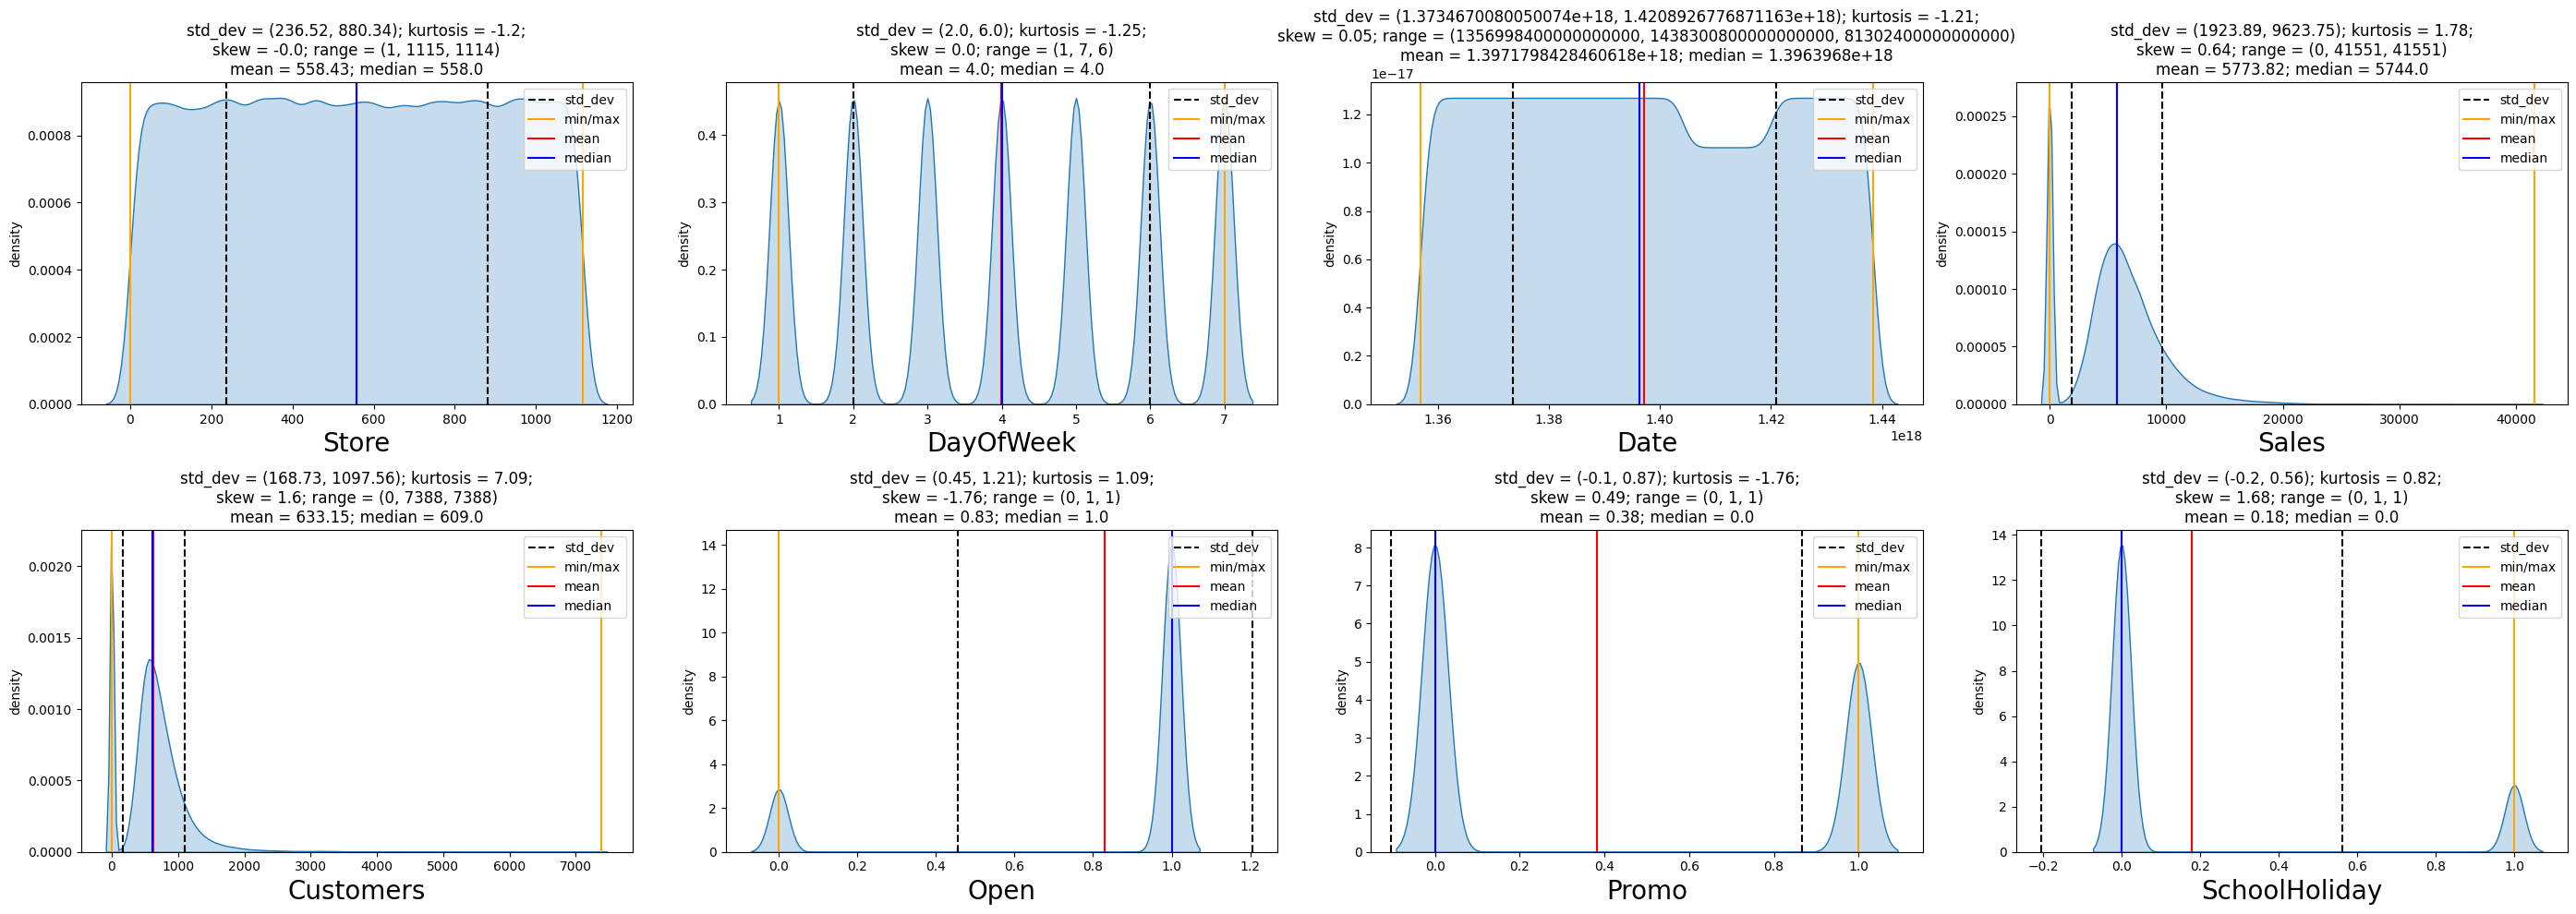

In [15]:
store_col = df.select_dtypes(include=['int64']).dtypes #df.columns
print(store_col)
store_col = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday']
UVA_numeric(df,store_col)

**Summary**

**Store**

*   **Distribution:** The Store numbers range widely from 1 to over 1100, indicating a large dataset of different store locations.
*   **Mean & Median:** The median store index is 558, suggesting that store distribution is fairly uniform across the dataset.
*   **Skewness:** Skewness is close to 0, indicating a fairly symmetrical distribution of stores within the dataset.
*   **Kurtosis:** A kurtosis of -1.2 suggests a platykurtic distribution, meaning that the data has lighter tails and a flatter peak compared to a normal distribution.

**DayOfWeek**

*   **Distribution:** Day of the Week values are evenly spread from 1 to 7, which represent days from Monday to Sunday.
*   **Mean & Median:** Both mean and median are around 4, which corresponds to the mid-week, showing a uniform distribution of data across all days of the week.
*   **Skewness & Kurtosis:** Both values are close to 0, suggesting a uniform distribution without significant outliers.

**Date**
*   **Distribution:** The 'Date' field is showing a very wide range, which might indicate improper handling of date values as numerical data.
*   **Mean & Median:** The mean and median of this field are extremely large values, which indicates the dates are being treated as numerical values rather than dates.
*   **Skewness:** The skewness is 0.05, showing a slight right skew.
*   **Kurtosis:** Kurtosis is -1.21, indicating the distribution is slightly flatter than normal.


**Sales**

*   **Distribution:** Sales vary significantly, with some stores having no sales (possibly closed) and others reaching up to 40,000.
*   **Mean & Median:** Sales average around 5,773 with a median of 5,744, indicating typical sales values cluster below the mean due to a right-skewed distribution.
*   **Skewness:** A positive skew indicates that most stores have low sales, with fewer stores achieving very high sales.
*   **Kurtosis:** A high kurtosis indicates a peak in sales distribution, with more outliers on the higher sales end.


**Customers**

*   **Distribution:** Similar to sales, the customer count per store varies widely from 0 to around 7,000.
*   **Mean & Median:** Mean customer count is around 633, slightly higher than the median of 609, suggesting a right-skewed distribution.
*   **Skewness:** Positive skewness reflects more stores with fewer customers and fewer instances of extremely high customer traffic.
*   **Kurtosis:** The distribution's peak and the presence of outliers with very high customer counts are confirmed by a high kurtosis value.


**Open**
*   **Distribution:** Most stores are either fully open or fully closed on a given day, as indicated by the binary values.
Mean & Median:** The mean is 0.83, indicating most stores are open on most days.
*   **Skewness:** Skewness is -1.76, showing a left skew where more days have open stores than closed ones.
*   **Kurtosis:** Kurtosis is 1.09, indicating a relatively normal distribution for this binary variable.

**Promo**
*   **Distribution:** Promo values indicate whether a store is running a promotion. Most stores are not running promotions.
*   **Mean & Median:** The mean is 0.38, and the median is 0.0, indicating that most days do not have promotions.
*   **Skewness:** Skewness is 0.49, showing a slight right skew.
*   **Kurtosis:** Kurtosis is -1.76, indicating a flat distribution, typical of binary data.

**SchoolHoliday**
*   **Distribution:** Most days are not school holidays.
*   **Mean & Median:** The mean is 0.18, and the median is 0.0, indicating that the majority of days do not coincide with school holidays.
*   **Skewness:** The skewness is 1.68, indicating a right skew, with more days being non-holidays.
*   **Kurtosis:** Kurtosis is 0.82, suggesting a fairly normal distribution for this binary variable.

# **Univariate Analysis : Categorical Varibales**

In [16]:
def UVA_category(data, var_group):
    '''
    countplot_category
    takes a group of variables (category) and plots count plots for each variable.
    '''

    size = len(var_group)
    plt.figure(figsize=(7 * size, 5), dpi=100)

    # For every variable
    for j, i in enumerate(var_group):
        plt.subplot(1, size, j + 1)
        # Use the 'viridis' palette for vibrant colors
        line = sns.countplot(x=data[i], palette='viridis')
        line.set_ylabel("Count", fontsize=15)
        line.set_xlabel(f"{i}", fontsize=15)
        line.set_title(f'{i} Count', fontsize=20)

    plt.tight_layout()
    plt.show()

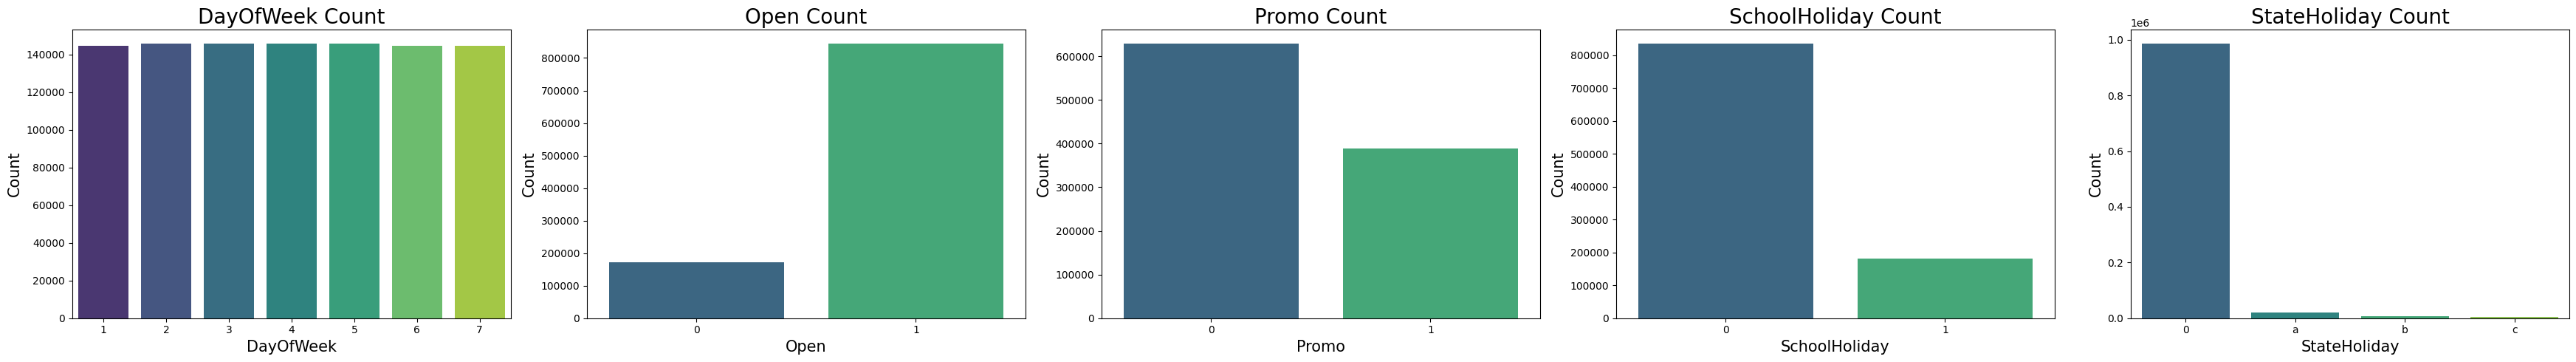

In [17]:
categorical_columns = ['DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'StateHoliday']
UVA_category(df, categorical_columns)

**Summary**

**DayOfWeek**

*   **Distribution:** The distribution across the days of the week is quite uniform, with similar numbers of records for each day.

**Open**
*   **Distribution:** A large proportion of the stores are open, with a significant difference between open (1) and closed (0) stores.

**Promo**
*   **Distribution:** There is a reasonable balance between stores running promotions (1) and those not running promotions (0), although the majority of data represents non-promotional periods.

**SchoolHoliday**

*   **Distribution:** The majority of the records fall under non-school holiday periods (0), with only a smaller portion representing school holidays (1).

**StateHoliday**
*   **Distribution:** Most records show no state holiday (0), with only a few representing other holidays (a, b, c).

# **Univariate: Missing Values**

In [18]:
df.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


The dataset contains no missing values across all columns.

# Univariate Analysis: Outliers

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def UVA_outlier(data, var_group, include_outlier=True):

    size = len(var_group)
    cols = 4  # Number of columns per row
    rows = 3  # Number of rows (adjust based on your preference, set it to 3)

    plt.figure(figsize=(7*cols, 5*rows), dpi=100)

    # Looping for each variable
    for j, i in enumerate(var_group):
        # If the variable is a datetime, convert it to numeric (e.g., seconds since epoch)
        if pd.api.types.is_datetime64_any_dtype(data[i]):
            data_numeric = data[i].apply(lambda x: x.timestamp() if pd.notnull(x) else pd.NaT)
        elif pd.api.types.is_timedelta64_dtype(data[i]):
            data_numeric = data[i].dt.total_seconds()
        else:
            data_numeric = data[i]

        # Calculating descriptives of variable
        quant25 = data_numeric.quantile(0.25)
        quant75 = data_numeric.quantile(0.75)
        IQR = quant75 - quant25
        med = data_numeric.median()
        whis_low = med - (1.5 * IQR)
        whis_high = med + (1.5 * IQR)

        # Calculating Number of Outliers
        outlier_high = len(data_numeric[data_numeric > whis_high])
        outlier_low = len(data_numeric[data_numeric < whis_low])

        if include_outlier:
            # Plotting the variable with every information
            plt.subplot(rows, cols, j + 1)
            sns.boxplot(data_numeric, orient="v", palette='viridis')
            plt.ylabel('{}'.format(i))
            plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd, 3rd quartile = {};\n Outlier (low/high) = {} \n'.format(
                round(IQR, 2),
                round(med, 2),
                (round(quant25, 2), round(quant75, 2)),
                (outlier_low, outlier_high)
            ))
        else:
            # Replacing outliers with max/min whisker
            data2 = data_numeric.copy()
            data2[data2 > whis_high] = whis_high + 1
            data2[data2 < whis_low] = whis_low - 1

            # Plotting without outliers
            plt.subplot(rows, cols, j + 1)
            sns.boxplot(data2, orient="v", palette='viridis')
            plt.ylabel('{}'.format(i))
            plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd, 3rd quartile = {};\n Outliers (low/high) = {} \n'.format(
                round(IQR, 2),
                round(med, 2),
                (round(quant25, 2), round(quant75, 2)),
                (outlier_low, outlier_high)
            ))

    plt.tight_layout()
    plt.show()

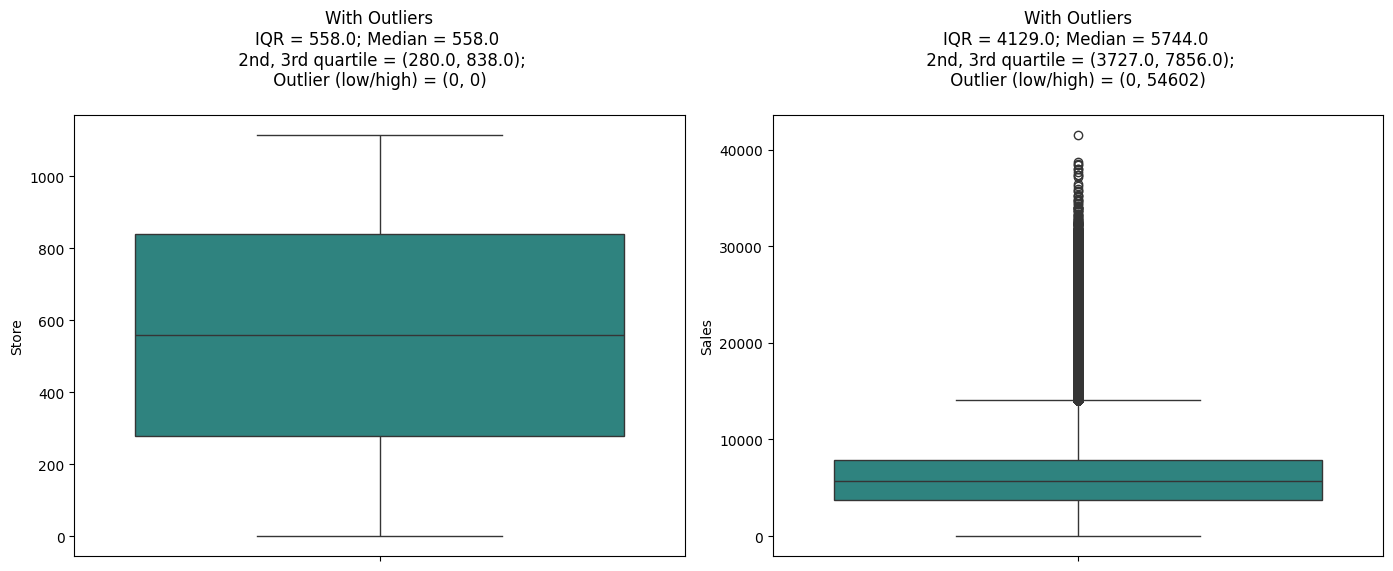

In [20]:
numeric_columns = ['Store', 'Sales']
UVA_outlier(df, numeric_columns)

**Summary**

**Store**
*   **Distribution:** The data points for stores are evenly distributed, with a median value of 558. There are no outliers, and the interquartile range (IQR) spans from 280 to 838, indicating a balanced representation across stores.
*   **Outliers:** There are no extreme outliers in the store data.

**Sales**
*   **Distribution:** The sales data shows a wide range, with a median of 5744 and an IQR from 3727 to 7856. However, there are significant outliers, with one data point reaching as high as 54,602.
*   **Outliers:** High outliers in sales shows some stores experienced much higher sales than the average, likely during peak seasons or promotions.

# **Bivariate Analysis : Numerical-Numerical**

In [21]:
numerical = df.select_dtypes(include=['int32', 'int64','float64','Int64'])[:]
numerical.dtypes

,0
Store,int64
DayOfWeek,int64
Date,int64
Sales,int64
Customers,int64
Open,int64
Promo,int64
SchoolHoliday,int64


# **Correlation Matrix**

In [22]:
correlation = numerical.dropna().corr()
correlation

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday
Store,1.000000,-0.000008,0.000842,0.005126,0.024325,-0.000047,0.000058,0.000641
DayOfWeek,-0.000008,1.000000,0.000183,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388
Date,0.000842,0.000183,1.000000,0.041904,0.012679,-0.000157,0.017249,0.001068
Sales,0.005126,-0.462125,0.041904,1.000000,0.894711,0.678472,0.452345,0.085124
Customers,0.024325,-0.386445,0.012679,0.894711,1.000000,0.616768,0.316169,0.071568
Open,-0.000047,-0.528963,-0.000157,0.678472,0.616768,1.000000,0.295042,0.086171
Promo,0.000058,-0.392925,0.017249,0.452345,0.316169,0.295042,1.000000,0.067483
SchoolHoliday,0.000641,-0.205388,0.001068,0.085124,0.071568,0.086171,0.067483,1.000000


# **Heatmap**

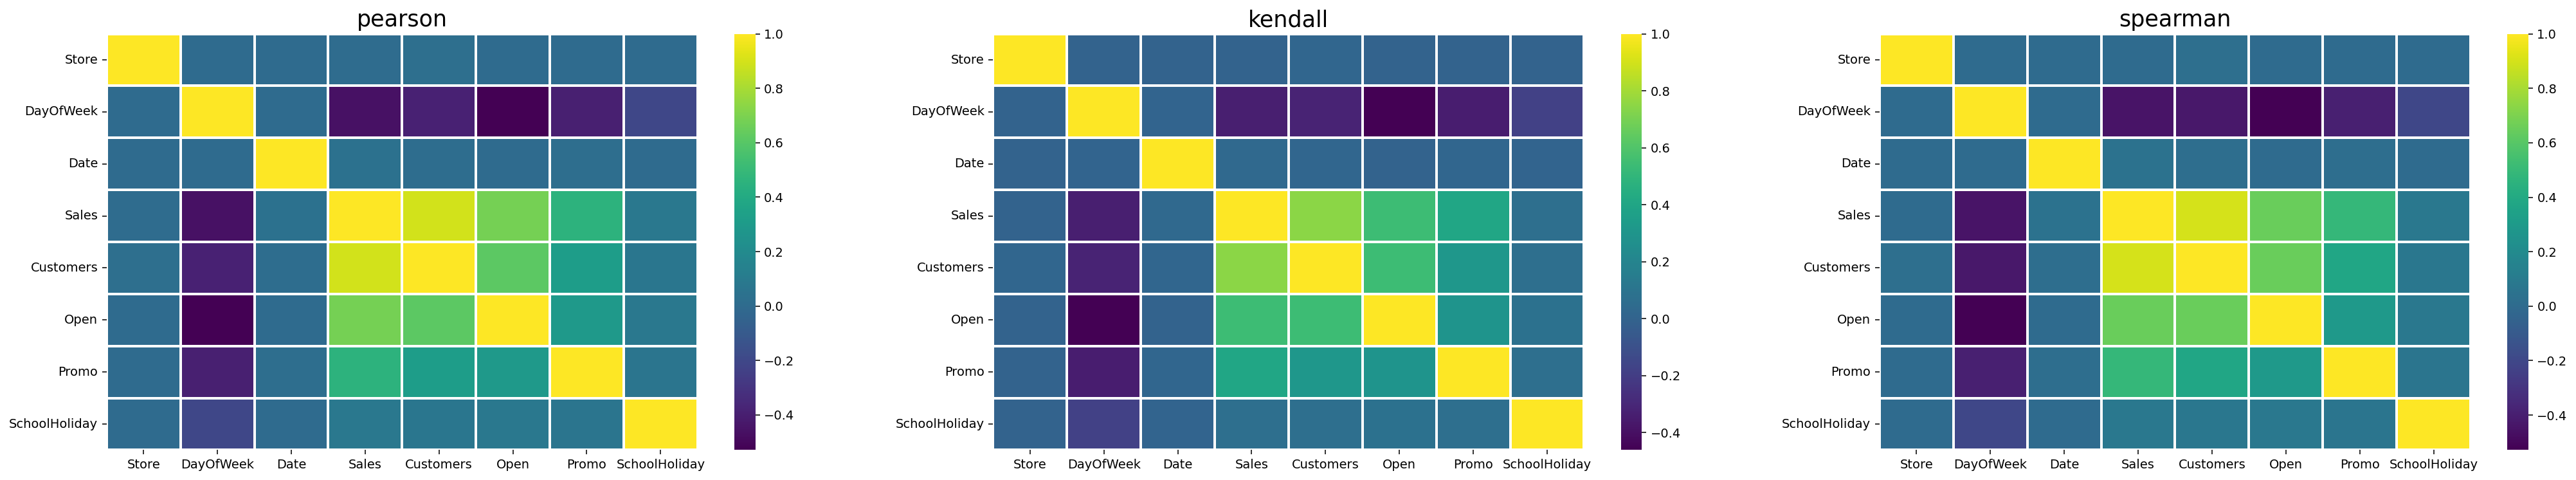

In [23]:
# plotting heatmap utilize all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2, cmap='viridis')
  plt.title(i, fontsize=18)

**Summary**

**Pearson Correlation:** Strong linear relationships are evident between **Sales** and **Customers**, meaning more customers tend to result in higher sales. Other variables, like **Open** and **SchoolHoliday**, show weak or no direct correlation.

**Kendall and Spearman Correlations:** These methods show similar patterns, indicating consistent rank-order relationships. The connection between **Sales** and **Customers** remains strong across all methods.

**Things to Investigate Further:** Sales and Customers are closely related, while other variables like **Promo** and **Open** show weaker relationship. These may need further exploration to understand deeper patterns.

# **Scatterplot**

In [24]:
def plot_scatterplot(dataframe, columns):
    """
    Plots a scatterplot for the specified columns in the given DataFrame.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    columns (list): A list of column names to include in the pairplot.
    """
    # Filter the DataFrame to include only the columns that exist
    valid_columns = [col for col in columns if col in dataframe.columns]

    # Check if there are any valid columns to plot
    if valid_columns:
        numerical_subset = dataframe[valid_columns]
        plt.figure(dpi=140)
        sns.pairplot(numerical_subset, palette='viridis')
        plt.show()
    else:
        print("None of the specified columns are present in the DataFrame.")

<Figure size 896x672 with 0 Axes>

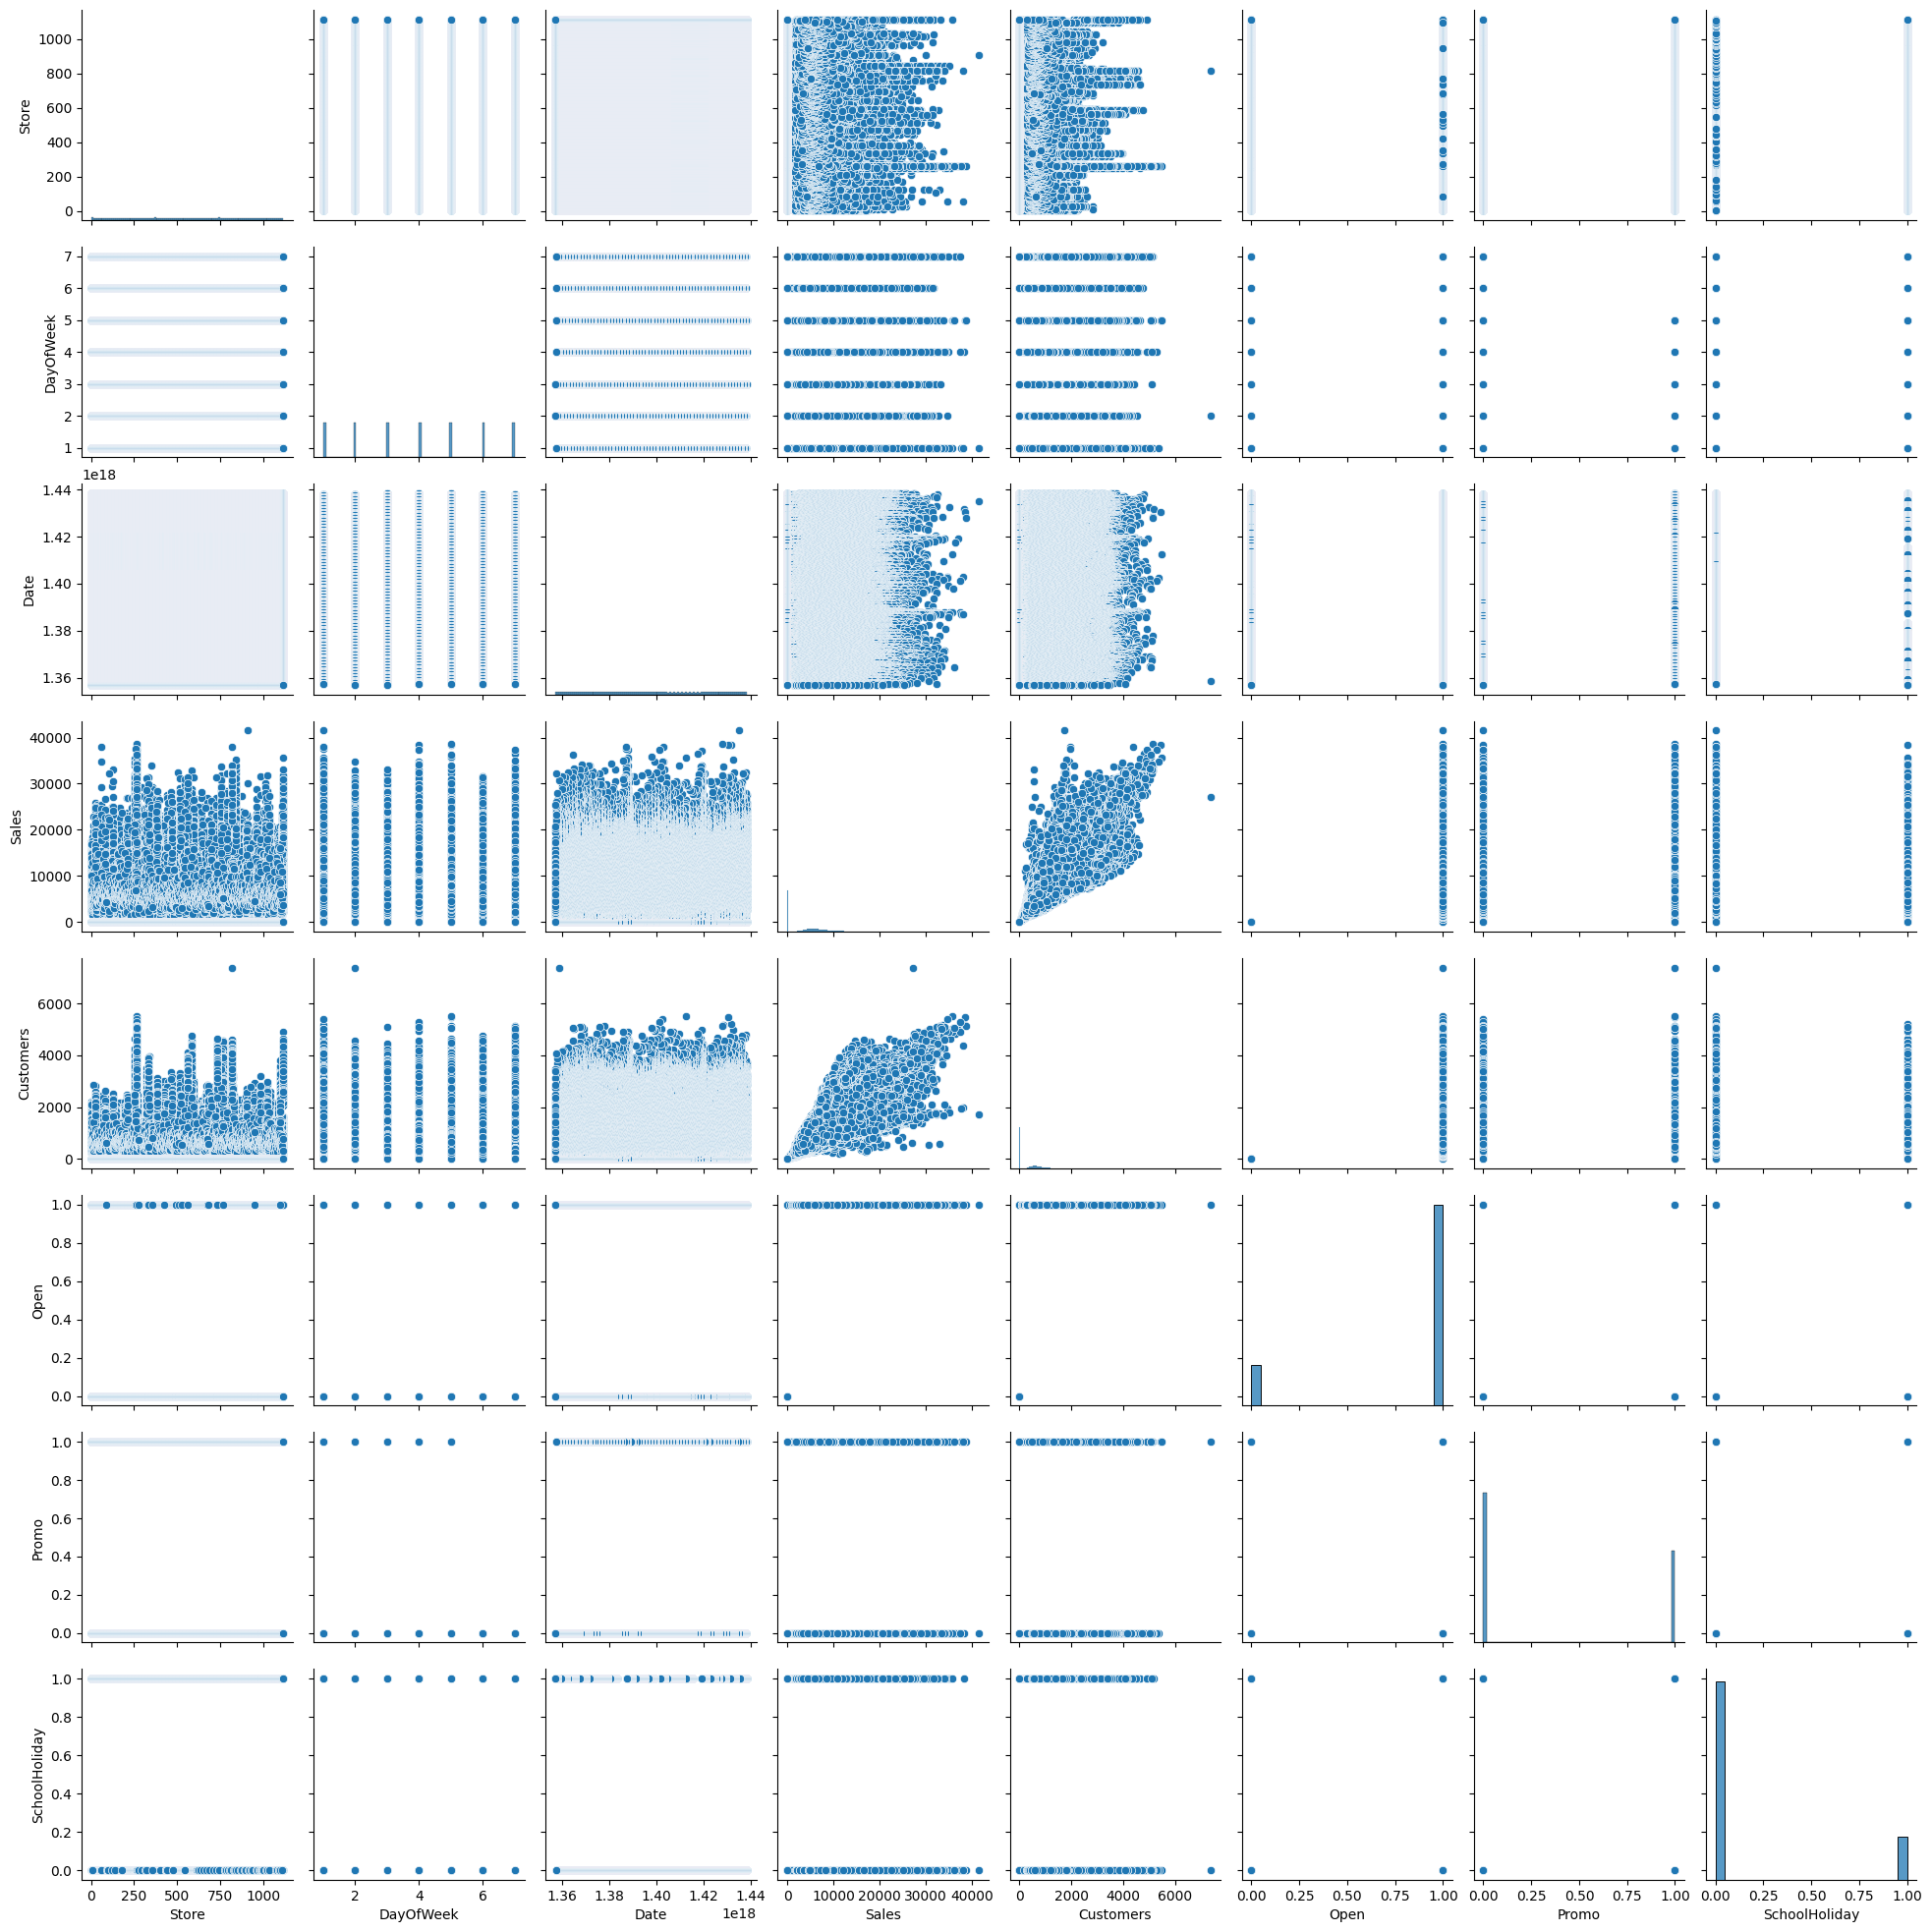

In [25]:
# Get the numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Call the plot function with DataFrame and numeric columns
plot_scatterplot(df, numeric_columns)

# **Encoding**

In [26]:
df_org = df.copy()

# Perform dummy encoding for the 'StateHoliday' column
df = pd.get_dummies(df, columns=['StateHoliday'], prefix='StateHoliday', drop_first=True)

# Change the data type of all columns to int, except the 'Date' column
for col in df.columns:
    if col != 'Date':
        df[col] = df[col].astype(int)

# Verify the result by checking the first few rows
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,1438300800000000000,5263,555,1,1,1,1,0,0,0
1,2,5,1438300800000000000,6064,625,1,1,1,1,0,0,0
2,3,5,1438300800000000000,8314,821,1,1,1,1,0,0,0
3,4,5,1438300800000000000,13995,1498,1,1,1,1,0,0,0
4,5,5,1438300800000000000,4822,559,1,1,1,1,0,0,0


# **Clustring**

# Pre processing

**Memory Management**

In [27]:
df.memory_usage().sum()/1024**2

93.12838745117188

In [28]:
start_mem = df.memory_usage().sum() / 1024**2
print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

Memory usage of dataframe is 93.13 MB


In [29]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c'],
      dtype='object')

In [30]:
for col in df.columns:
    if df[col].dtype != 'object':
        if df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
        elif df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
    else:
        df[col] = df[col].astype('category')

In [31]:
end_mem = df.memory_usage().sum() / 1024**2
print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))

Memory usage after optimization is: 46.56 MB


# Summarize data

In [32]:
# Summarize dat by store (Sales and Customers)
base_df = df.groupby('Store')[['Sales', 'Customers']].sum().reset_index()

base_df.head()

,Store,Sales,Customers
0,1,3716854,440523
1,2,3883858,457855
2,3,5408261,584310
3,4,7556507,1036254
4,5,3642818,418588


# Show outliers

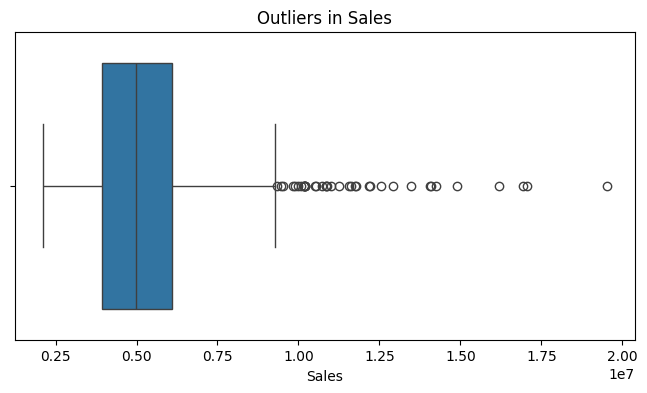

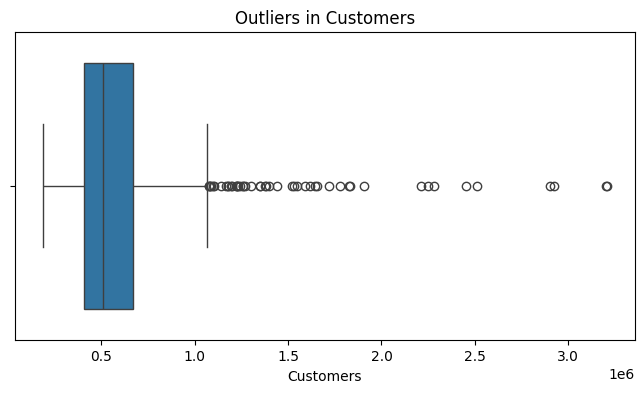

In [33]:
# Visualize outliers
def plot_outliers(data, column):
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x=column)
    plt.title(f'Outliers in {column}')
    plt.show()

plot_outliers(base_df, 'Sales')
plot_outliers(base_df, 'Customers')

# Remove outliers from sales and customers columns

In [34]:
# Remove outliers using IQR
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), df[column].median(), df[column])
    return df

base_df = remove_outliers(base_df, 'Sales')
base_df = remove_outliers(base_df, 'Customers')

base_df.head()

,Store,Sales,Customers
0,1,3716854.0,440523.0
1,2,3883858.0,457855.0
2,3,5408261.0,584310.0
3,4,7556507.0,1036254.0
4,5,3642818.0,418588.0


# Min-Max Scaler for sales and customers

In [35]:
from sklearn.preprocessing import MinMaxScaler

# Store original values to keep a reference
base_df_original = base_df[['Store', 'Sales', 'Customers']].copy()

# Apply Min-Max Scaling
scaler = MinMaxScaler()
base_df[['Sales', 'Customers']] = scaler.fit_transform(base_df[['Sales', 'Customers']])

base_df.head()

,Store,Sales,Customers
0,1,0.223637,0.287274
1,2,0.246943,0.306959
2,3,0.459677,0.450579
3,4,0.759470,0.963870
4,5,0.213305,0.262362


# Elbow curve

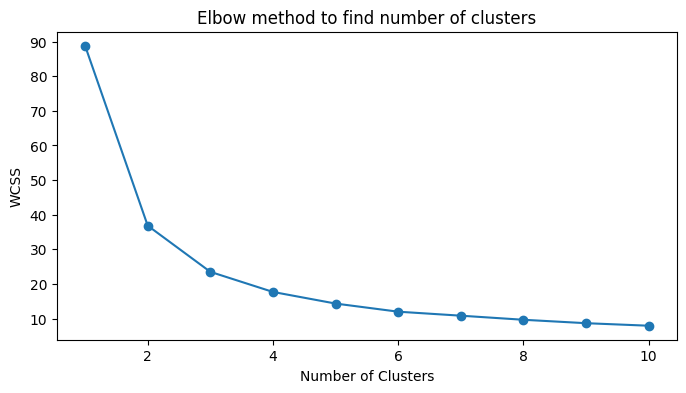

In [36]:
from sklearn.cluster import KMeans

# Elbow curve to find number of clusters
def plot_elbow_curve(data, max_k):
    wcss = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_k+1), wcss, marker='o')
    plt.title('Elbow method to find number of clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

plot_elbow_curve(base_df[['Sales', 'Customers']], 10)

# Cluster Data

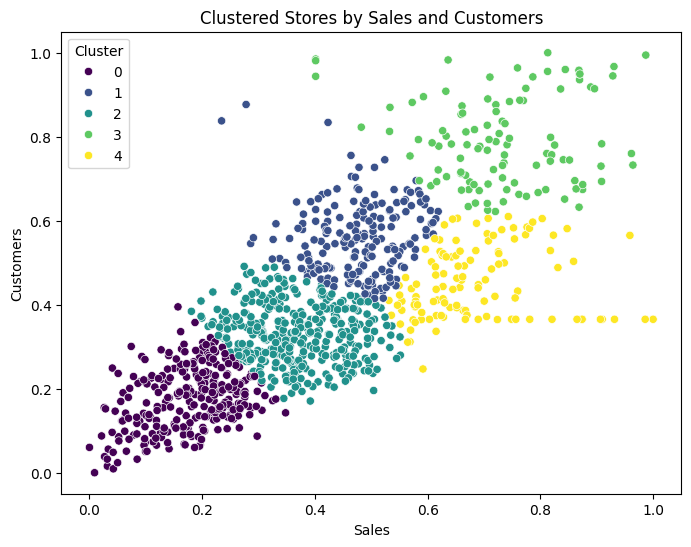

In [37]:
clusters = 5
kmeans = KMeans(n_clusters = clusters, random_state = 42)
base_df['Cluster'] = kmeans.fit_predict(base_df[['Sales', 'Customers']])

# Plot the clustered data
plt.figure(figsize=(8, 6))
sns.scatterplot(data=base_df, x='Sales', y='Customers', hue='Cluster', palette='viridis')
plt.title('Clustered Stores by Sales and Customers')
plt.show()

**Cluster with lower customers and lower sales**

In [38]:
# Find the cluster with the lowest mean sales and customers
cluster_means = base_df.groupby('Cluster')[['Sales', 'Customers']].mean()
lowest_cluster = cluster_means.idxmin()

print(f"The cluster with the lowest Sales and Customers is: {lowest_cluster}")

The cluster with the lowest Sales and Customers is: Sales        0
Customers    0
dtype: int32


# Stores with lowest customers and lowest sales

In [39]:
worst_performing_stores = base_df[base_df['Cluster'] == lowest_cluster[0]]

print("Low Performance Stores:")
worst_performing_stores

Low Performance Stores:


,Store,Sales,Customers,Cluster
0,1,0.223637,0.287274,0
4,5,0.213305,0.262362,0
12,13,0.141263,0.056965,0
21,22,0.095898,0.141452,0
22,23,0.305058,0.213786,0
...,...,...,...,...
1105,1106,0.240400,0.283465,0
1106,1107,0.246734,0.259985,0
1108,1109,0.132630,0.106500,0
1109,1110,0.200141,0.267325,0


# Stores with lowest perfomance ?????

In [40]:
# Merge worst-performing stores with the original dataset
worst_performing_stores_full = pd.merge(worst_performing_stores[['Store']], df_org, on='Store', how='inner')

worst_performing_stores_full.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,1438300800000000000,5263,555,1,1,0,1
1,1,4,1438214400000000000,5020,546,1,1,0,1
2,1,3,1438128000000000000,4782,523,1,1,0,1
3,1,2,1438041600000000000,5011,560,1,1,0,1
4,1,1,1437955200000000000,6102,612,1,1,0,1


# Summary Statistics for lowest performance

In [41]:
print("Summary Statistics for Low Performance Stores:")
worst_performing_stores_full.describe()

Summary Statistics for Low Performance Stores:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday
count,252940.000000,252940.000000,2.529400e+05,252940.000000,252940.000000,252940.000000,252940.000000,252940.000000
mean,569.117909,3.999012,1.396495e+18,3887.704203,394.585218,0.824207,0.380565,0.174184
std,323.812788,1.997462,2.401056e+16,2312.742834,219.029871,0.380644,0.485527,0.379268
min,1.000000,1.000000,1.356998e+18,0.000000,0.000000,0.000000,0.000000,0.000000
25%,282.000000,2.000000,1.375834e+18,2815.000000,310.000000,1.000000,0.000000,0.000000
50%,583.000000,4.000000,1.394669e+18,4131.000000,437.000000,1.000000,0.000000,0.000000
75%,852.000000,6.000000,1.419206e+18,5352.000000,538.000000,1.000000,1.000000,0.000000
max,1111.000000,7.000000,1.438301e+18,24975.000000,1475.000000,1.000000,1.000000,1.000000


# Distribution of Sales and Customers

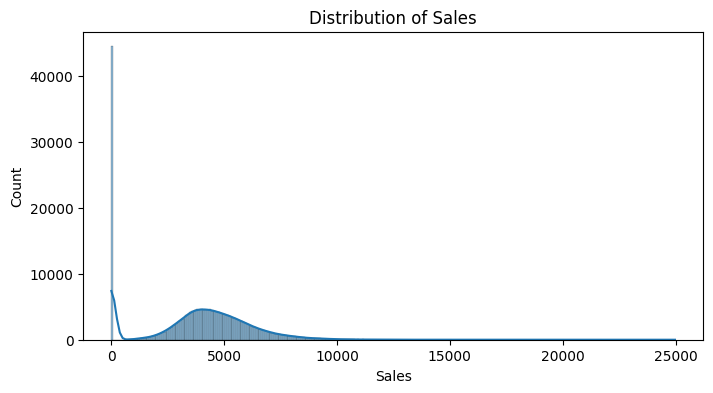

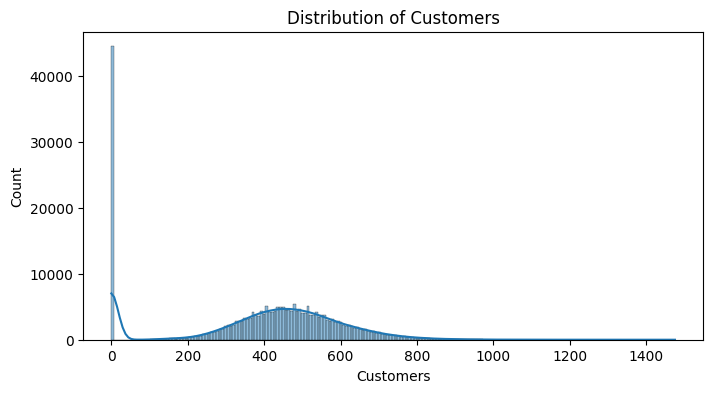

In [42]:
def plot_distribution(data, column):
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data, x=column, kde=True)
    plt.title(f'Distribution of {column}')

    plt.show()

plot_distribution(worst_performing_stores_full, 'Sales')
plot_distribution(worst_performing_stores_full, 'Customers')

The plots show that most worst-performing stores have low Sales (0-5,000) and Customers (0-600), with a few outliers showing higher values.

# Impact of Promotions on Sales and Customers

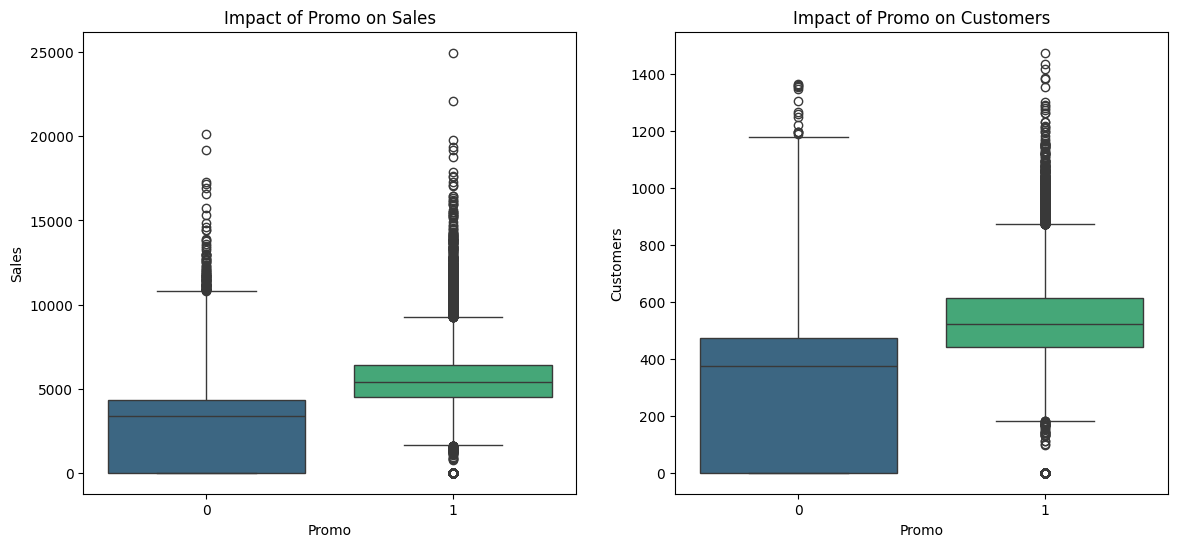

In [43]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=worst_performing_stores_full, x='Promo', y='Sales', palette='viridis')
plt.title("Impact of Promo on Sales")

plt.subplot(1, 2, 2)
sns.boxplot(data=worst_performing_stores_full, x='Promo', y='Customers', palette='viridis')
plt.title("Impact of Promo on Customers")
plt.show()

The boxplots show that promotions increase both sales and the number of customers in stores. On days with promotions, stores generally make more sales and see more customers than on days without promotions. However, there's still a big variation in how much sales and customers increase, as shown by the outliers.

# Day of the Week impact

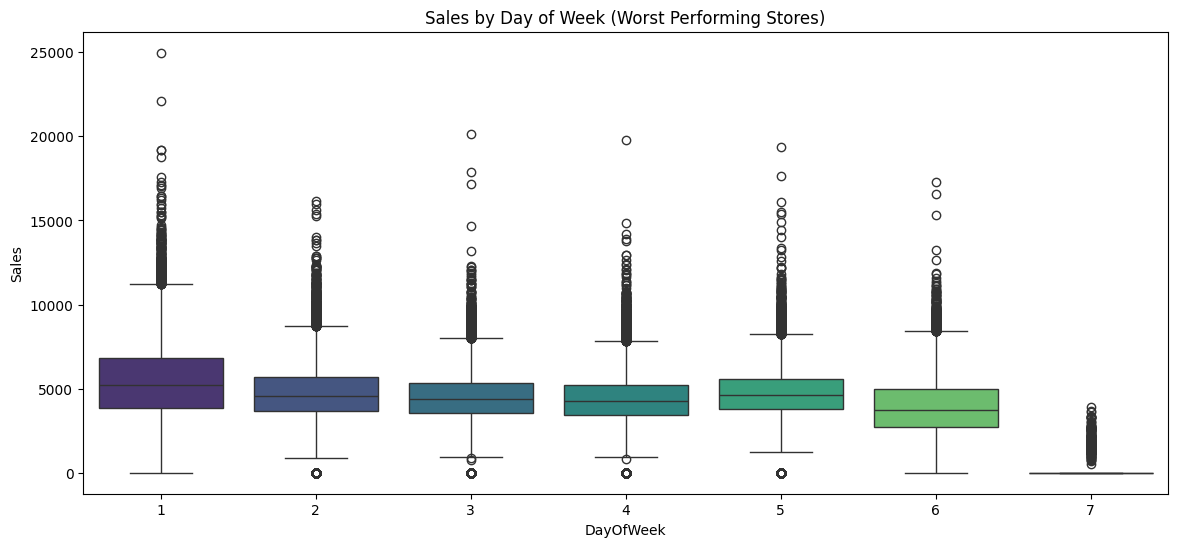

In [44]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=worst_performing_stores_full, x='DayOfWeek', y='Sales', palette='viridis')
plt.title("Sales by Day of Week (Worst Performing Stores)")
plt.show()

The graph shows that sales in the worst-performing stores are generally stable from Day 1 to Day 6, with similar sales patterns across these days. However, Day 7 (Sunday) has noticeably lower sales compared to the other days of the week. This shows that the stores tend to perform worse on Sundays.

# Impact of Holidays

In [45]:
worst_performing_stores_full.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,1438300800000000000,5263,555,1,1,0,1
1,1,4,1438214400000000000,5020,546,1,1,0,1
2,1,3,1438128000000000000,4782,523,1,1,0,1
3,1,2,1438041600000000000,5011,560,1,1,0,1
4,1,1,1437955200000000000,6102,612,1,1,0,1


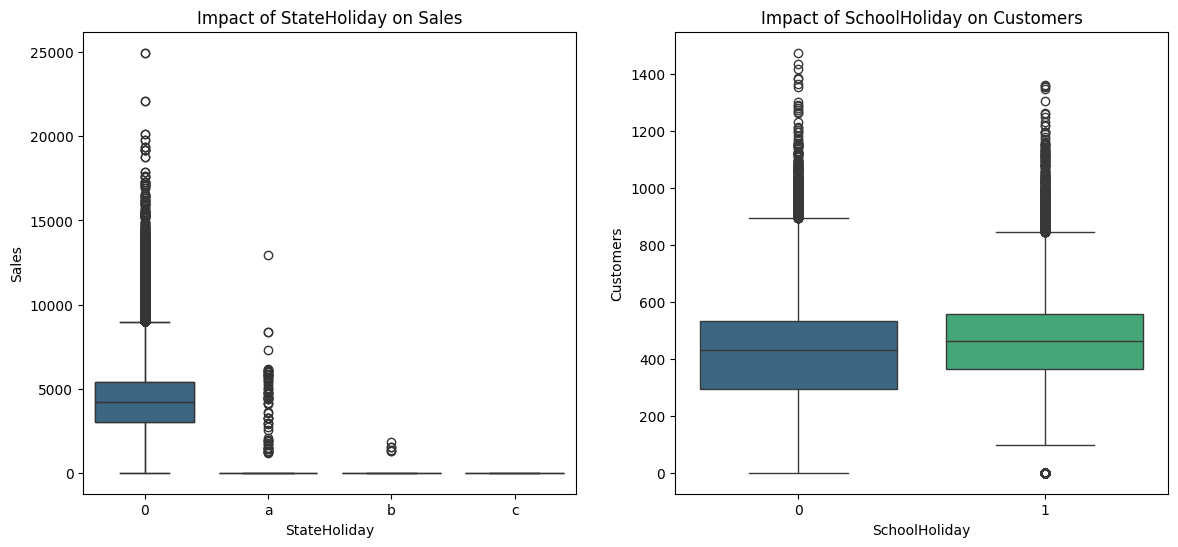

In [46]:
# Assuming the columns are named differently or need processing, update them as necessary
# Example if the columns have different names like 'State_Holiday' and 'School_Holiday'
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=worst_performing_stores_full, x='StateHoliday', y='Sales', palette='viridis')
plt.title("Impact of StateHoliday on Sales")

plt.subplot(1, 2, 2)
sns.boxplot(data=worst_performing_stores_full, x='SchoolHoliday', y='Customers', palette='viridis')
plt.title("Impact of SchoolHoliday on Customers")
plt.show()

The left chart shows that sales are significantly lower during StateHolidays (a, b, c) compared to normal days (0), with most sales concentrated around zero during holidays. The right chart indicates that the number of customers is slightly higher during SchoolHolidays, but the difference is not significant compared to non-holidays. In short, holidays negatively impact store sales.

# Month impact

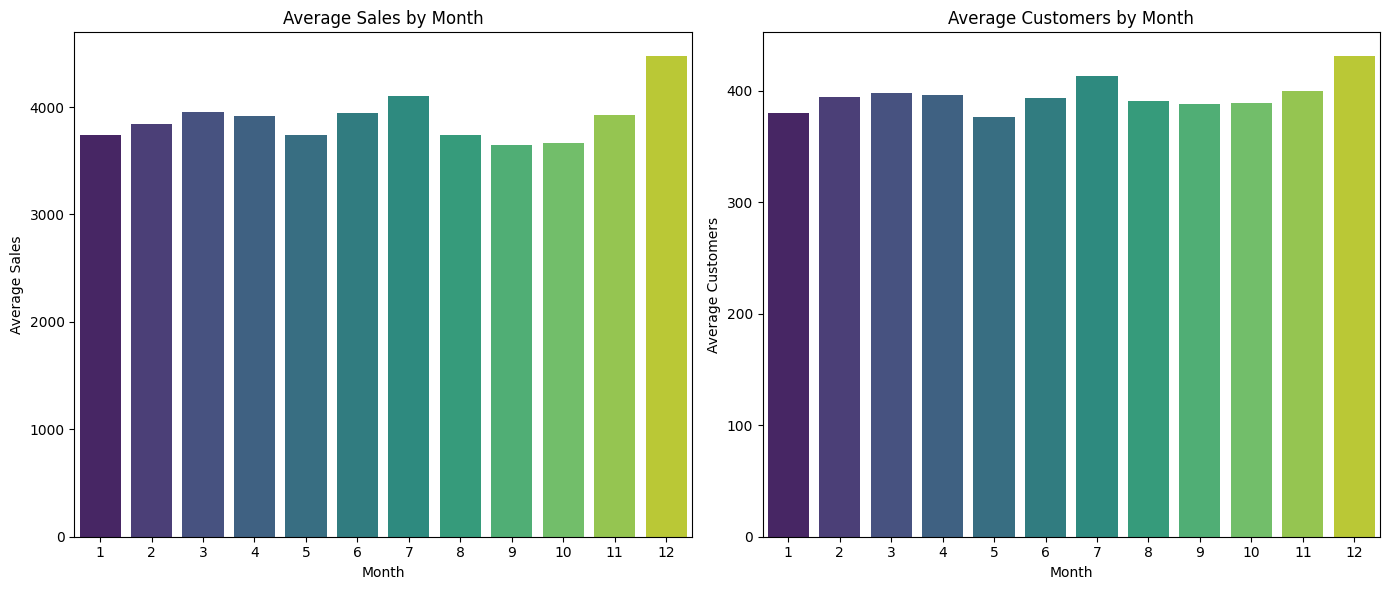

In [47]:
# Ensure the 'Date' column is in datetime format
worst_performing_stores_full['Date'] = pd.to_datetime(worst_performing_stores_full['Date'])

# Extract month from the 'Date' column
worst_performing_stores_full['Month'] = worst_performing_stores_full['Date'].dt.month

# Group data by Month and calculate the average Sales and Customers
monthly_performance = worst_performing_stores_full.groupby('Month')[['Sales', 'Customers']].mean().reset_index()

# Plot performance based on months
plt.figure(figsize=(14, 6))

# Plot Sales by month
plt.subplot(1, 2, 1)
sns.barplot(data=monthly_performance, x='Month', y='Sales', palette='viridis')
plt.title("Average Sales by Month")
plt.xlabel("Month")
plt.ylabel("Average Sales")

# Plot Customers by month
plt.subplot(1, 2, 2)
sns.barplot(data=monthly_performance, x='Month', y='Customers', palette='viridis')
plt.title("Average Customers by Month")
plt.xlabel("Month")
plt.ylabel("Average Customers")

plt.tight_layout()
plt.show()


The bar charts show the average sales and customer count per month for the worst-performing stores. Sales and customer numbers are relatively stable across months, with July (Month 7) and December (Month 12) showing a noticeable peak in both sales and customer activity.

# Number of open days impact

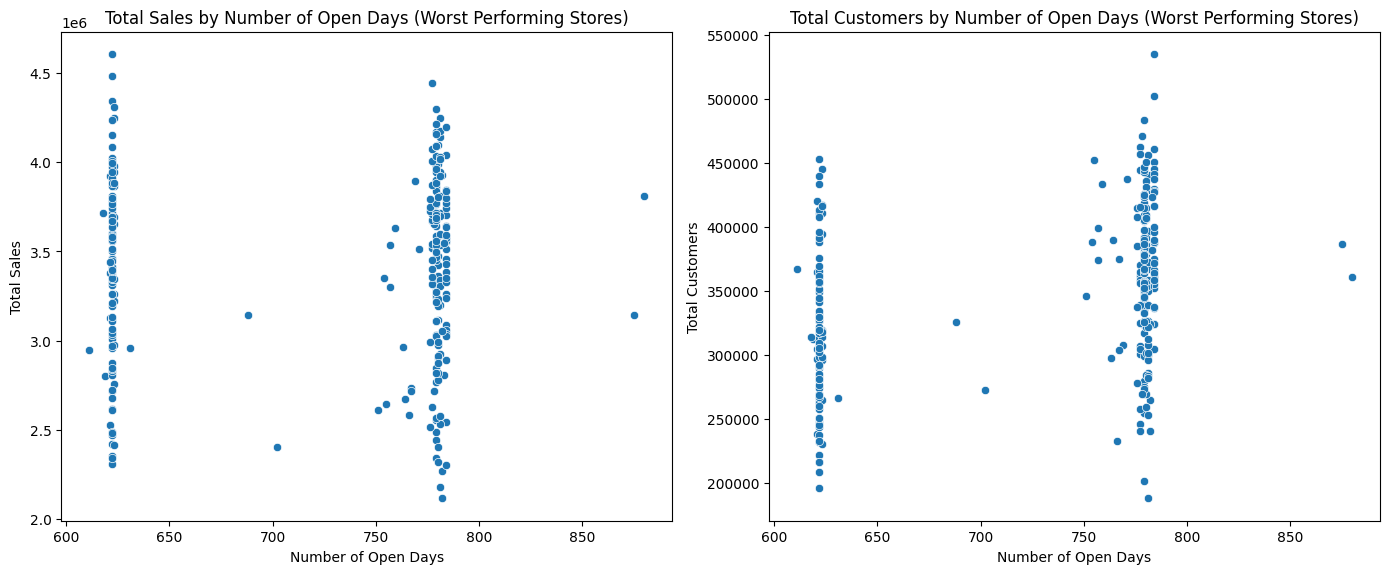

In [48]:
# Summarize total sales, customers, and number of open days by store
store_open_days = worst_performing_stores_full.groupby('Store').agg(
    total_sales=('Sales', 'sum'),
    total_customers=('Customers', 'sum'),
    open_days=('Open', 'sum')  # Sum of 'Open' gives the number of days a store was open
).reset_index()

# Plot Sales vs. Open Days
plt.figure(figsize=(14, 6))

# Sales vs Open Days
plt.subplot(1, 2, 1)
sns.scatterplot(data=store_open_days, x='open_days', y='total_sales', palette='viridis')
plt.title("Total Sales by Number of Open Days (Worst Performing Stores)")
plt.xlabel("Number of Open Days")
plt.ylabel("Total Sales")

# Customers vs Open Days
plt.subplot(1, 2, 2)
sns.scatterplot(data=store_open_days, x='open_days', y='total_customers', palette='viridis')
plt.title("Total Customers by Number of Open Days (Worst Performing Stores)")
plt.xlabel("Number of Open Days")
plt.ylabel("Total Customers")

plt.tight_layout()
plt.show()


Most stores with around 600–650 or 750–800 open days have similar sales, ranging between 2.5 to 4 million. There are a few stores with lower or higher sales, but the number of open days doesn’t seem to make a big difference in increasing sales.

Similarly, for customers, stores with about 600–800 open days mostly attract 250,000 to 400,000 customers. The number of open days doesn't have a clear impact on bringing in more customers. Overall, having more open days doesn't strongly increase sales or customers for these stores.

# Sales and Customers Over Time

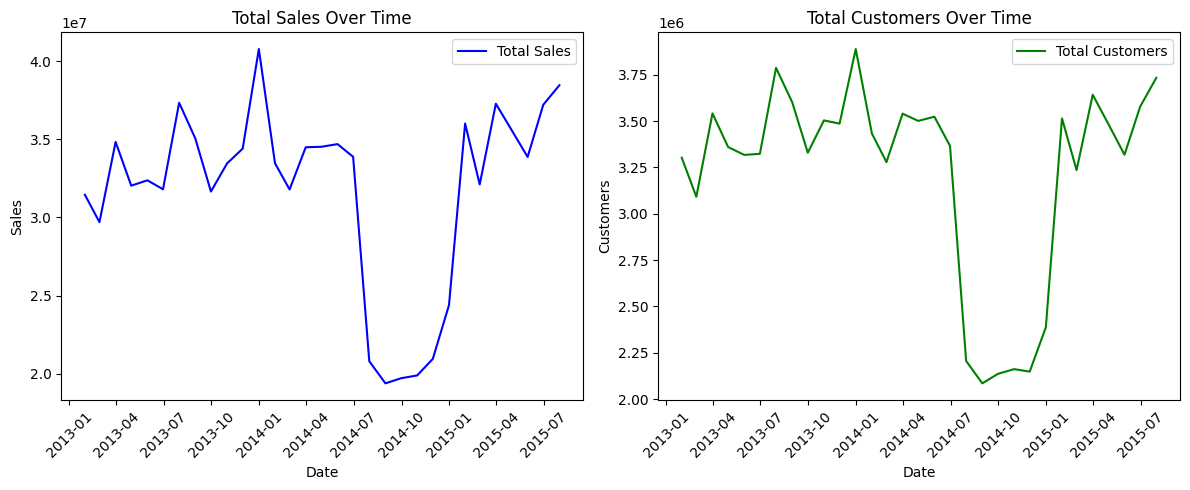

In [50]:
# Ensure 'Date' column is in datetime format
worst_performing_stores_full['Date'] = pd.to_datetime(worst_performing_stores_full['Date'])

# Set 'Date' as the index
worst_performing_stores_full.set_index('Date', inplace=True)

# Monthly data
monthly_sales_customers = worst_performing_stores_full.resample('M').agg({'Sales': 'sum', 'Customers': 'sum'})

# Plot Sales and Customers over time in 1x2 layout (without grid)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot Sales over time
ax1.plot(monthly_sales_customers.index, monthly_sales_customers['Sales'], label='Total Sales', color='blue')
ax1.set_title('Total Sales Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales')
ax1.tick_params(axis='x', rotation=45)
ax1.legend()

# Plot Customers over time
ax2.plot(monthly_sales_customers.index, monthly_sales_customers['Customers'], label='Total Customers', color='green')
ax2.set_title('Total Customers Over Time')
ax2.set_xlabel('Date')
ax2.set_ylabel('Customers')
ax2.tick_params(axis='x', rotation=45)
ax2.legend()

# Display the plots
plt.tight_layout()
plt.show()

Both sales and customers had a significant drop around mid-2014, reaching the lowest point in 2014 Q3. However, after this decline, both metrics began to recover steadily throughout 2015, with a clear upward trend towards mid-2015. This indicates that stores went through a rough period but were able to regain momentum later.